In [1]:
import numpy as np
import pandas as pd
from voting_rules import *

In [2]:
pref_matrix = pd.read_pickle("post_id_preferences.pkl")
pref_matrix

,Post_ID,preferences
0,1gi2awo,"[[9, 6, 6, 1, 10, 9, 9, 9, 10, 9, 9, 9, 9, 6, ..."
1,1gi378c,"[[3, 2, 1, 3, 14, 3, 2, 3, 8, 3, 3, 1, 1, 3, 1..."
2,1gi5k6b,"[[14, 3, 14, 4, 3, 3, 3, 4, 3, 14, 3, 2, 2, 3,..."
3,1gi6rmt,"[[3, 2, 10, 2, 2, 10, 2, 2, 3, 3, 3, 3, 10, 3,..."
4,1giwkq5,"[[1, 1, 1, 2, 5, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2,..."
5,1giy3mj,"[[7, 8, 1, 2, 4, 5, 6, 6, 5, 7, 4, 7, 2, 8, 8,..."
6,1gj6zkq,"[[3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3,..."
7,1gjc9pm,"[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,..."
8,1gjquni,"[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,..."
9,1gjvwc2,"[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,..."


In [3]:
pref_matrix['preferences'] = pref_matrix['preferences'].apply(
    lambda x: [list(map(str, sublist)) for sublist in x]  # Convert each inner list to a list of strings
)

# Running the Voting Rules

In [4]:
# Initialize results DataFrame
results = pd.DataFrame(index=range(0, 17), columns=["plurality", "borda", "condorcet", "stv", "approval", "copeland"])
results["Post_ID"] = pref_matrix["Post_ID"]
# Dictionary of voting rule functions
voting_rules = {
    "plurality": plurarity_winner,
    "borda": borda_winner,
    "stv": stv_winner,
    "copeland": copeland_winner,
    "condorcet" : condorcet_winner,
    "approval": k_approval_winner
}

In [5]:
results

,plurality,borda,condorcet,stv,approval,copeland,Post_ID
0,NaN,NaN,NaN,NaN,NaN,NaN,1gi2awo
1,NaN,NaN,NaN,NaN,NaN,NaN,1gi378c
2,NaN,NaN,NaN,NaN,NaN,NaN,1gi5k6b
3,NaN,NaN,NaN,NaN,NaN,NaN,1gi6rmt
4,NaN,NaN,NaN,NaN,NaN,NaN,1giwkq5
5,NaN,NaN,NaN,NaN,NaN,NaN,1giy3mj
6,NaN,NaN,NaN,NaN,NaN,NaN,1gj6zkq
7,NaN,NaN,NaN,NaN,NaN,NaN,1gjc9pm
8,NaN,NaN,NaN,NaN,NaN,NaN,1gjquni
9,NaN,NaN,NaN,NaN,NaN,NaN,1gjvwc2


In [6]:
voting_rules

{'plurality': <function voting_rules.plurarity_winner(P)>,
 'borda': <function voting_rules.borda_winner(preferences)>,
 'stv': <function voting_rules.stv_winner(P)>,
 'copeland': <function voting_rules.copeland_winner(preferences)>,
 'condorcet': <function voting_rules.condorcet_winner(pmr)>,
 'approval': <function voting_rules.k_approval_winner(preferences, k=3)>}

In [7]:
test = "1gi2awo"

# Try-except for extracting the matrix
try:
    matrix = np.array(pref_matrix.loc[pref_matrix["Post_ID"] == test, "preferences"].iloc[0])
    print(f"Matrix extracted successfully for Post_ID {test}")
except Exception as e:
    print(f"Error extracting matrix for {test}: {e}")

# Loop through voting rules
for rule in voting_rules.keys(): 
    try:
        print(f"\nApplying rule: {rule}")
        result = voting_rules[rule](matrix)  # Apply the rule to the matrix
        print(f"Result after applying {rule}: {result}")
    except Exception as e:
        print(f"Error applying rule {rule} to matrix: {e}")
        print(f"Matrix at time of error: {matrix}")  # Print the matrix in case of error
        print(f"Voting rule: {voting_rules[rule]}")  # Print the rule that caused the error


Matrix extracted successfully for Post_ID 1gi2awo

Applying rule: plurality
Result after applying plurality: 9

Applying rule: borda
Result after applying borda: 9

Applying rule: stv
majority found - 9
Result after applying stv: 9

Applying rule: copeland
Result after applying copeland: 9

Applying rule: condorcet
Result after applying condorcet: -1

Applying rule: approval
Result after applying approval: ['2', '4']


In [8]:
# Fill the table
for index, row in results.iterrows():
    try:
        idx = row["Post_ID"]
        matrix = np.array(pref_matrix.loc[pref_matrix["Post_ID"] == idx, "preferences"].iloc[0])
        
        print(f"Processing Post_ID: {idx}")
        print(f"Matrix for Post_ID {idx}: {matrix}")
        
        for rule in voting_rules.keys(): 
            try:
                # Apply the voting rule
                print(f"Applying rule: {rule}")
                result = voting_rules[rule](matrix)  # Assuming the rule is a function that takes matrix as input
                results.loc[index, rule] = result
                print(f"Applied {rule}, Result: {result}")
            except Exception as e:
                print(f"Error applying rule {rule} to matrix for Post_ID {idx}: {e}")
                print(f"Matrix: {matrix}")
        print(f"Item = {index}, Done with the post {idx}")
    
    except Exception as e:
        print(f"Error processing Post_ID {row['Post_ID']}: {e}")
        print(f"Row: {row}")
        print(f"Matrix: {matrix}")


Processing Post_ID: 1gi2awo
Matrix for Post_ID 1gi2awo: [['9' '6' '6' '1' '10' '9' '9' '9' '10' '9' '9' '9' '9' '6' '6' '9' '10'
  '9' '6' '10' '10' '9' '9' '9' '9' '9' '9' '10' '6' '6' '9' '9' '10' '9'
  '10' '10' '9' '9' '9' '6' '9' '9' '9' '9']
 ['1' '9' '9' '2' '3' '1' '1' '1' '9' '1' '1' '1' '10' '9' '9' '10' '9'
  '1' '9' '9' '9' '10' '10' '1' '10' '1' '1' '3' '9' '9' '1' '1' '3' '10'
  '5' '3' '1' '10' '1' '9' '1' '1' '10' '1']
 ['3' '1' '1' '3' '8' '3' '3' '3' '3' '2' '3' '3' '3' '1' '10' '3' '3'
  '3' '10' '3' '3' '3' '3' '3' '3' '3' '3' '5' '1' '1' '3' '3' '8' '3'
  '8' '9' '3' '3' '3' '10' '3' '3' '1' '3']
 ['10' '3' '3' '9' '9' '10' '10' '10' '5' '3' '10' '10' '5' '2' '1' '1'
  '8' '10' '3' '5' '5' '1' '1' '10' '1' '10' '10' '9' '3' '2' '10' '10'
  '9' '1' '3' '8' '10' '1' '10' '1' '10' '10' '3' '10']
 ['2' '8' '10' '10' '5' '2' '2' '4' '8' '10' '2' '2' '1' '3' '2' '5' '5'
  '2' '1' '8' '8' '5' '8' '2' '2' '2' '2' '8' '8' '3' '2' '2' '5' '4' '9'
  '5' '2' '2' '2' '2' '5' '2

In [9]:
results

,plurality,borda,condorcet,stv,approval,copeland,Post_ID
0,9,9,-1,9,NaN,9,1gi2awo
1,3,1,-1,3,[8],1,1gi378c
2,14,5,-1,14,[8],5,1gi5k6b
3,10,7,-1,10,[1],7,1gi6rmt
4,1,1,-1,1,[1],1,1giwkq5
5,7,6,-1,7,[2],6,1giy3mj
6,3,3,-1,3,[3],3,1gj6zkq
7,3,3,1,3,[3],3,1gjc9pm
8,3,3,-1,3,[8],3,1gjquni
9,3,3,-1,3,[8],3,1gjvwc2


# Visualization 


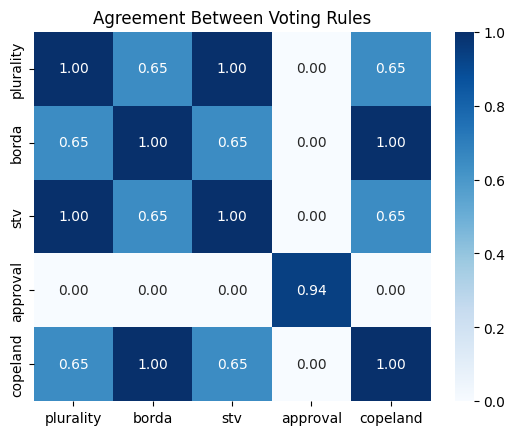

In [10]:
from itertools import combinations
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Assume results is a DataFrame with voting rules as columns and their respective winners in rows.
rules = [rule for rule in results.keys() if (rule != "condorcet") and (rule!= "Post_ID")]
agreement = np.zeros((len(rules), len(rules)))  # Initialize the agreement matrix

# Calculate agreement matrix
for i, rule1 in enumerate(rules):
    for j, rule2 in enumerate(rules):
        if i <= j:  # Only calculate upper triangle (matrix is symmetric)
            agree = (results[rule1].values == results[rule2].values).mean()  # Compare winners
            agreement[i, j] = agreement[j, i] = agree  # Fill both symmetric positions

# Create a heatmap of the agreement matrix
sns.heatmap(agreement, xticklabels=rules, yticklabels=rules, annot=True, cmap="Blues", fmt=".2f")
plt.title("Agreement Between Voting Rules")
plt.show()

# Ask agents to select a winner that is close to the verdict from the statements : 

In [39]:
clean_data = pd.read_csv("data/checkpoints_valid_preferences.csv")
verdicts = clean_data.loc[clean_data["Type"] == "Post"]
verdicts

,Type,Post_ID,Title,Author,Timestamp,Text,Score,Total_Comments,Post_URL,Filtered_Verdict,Verdict,Popular,clean_text,response,order,reasoning
0,Post,1gkukkp,AITA for slipping money into my boyfriend’s wa...,AddressAntique2983,2024-11-06 09:22:41,[removed],1382,107,https://www.reddit.com/r/AmItheAsshole/comment...,The final verdict is: **Asshole**\n\nJudgement...,NaN,YTA,[removed],NaN,NaN,NaN
49,Post,1gkhp7b,AITA for telling my friends I don't want to re...,sylnium,2024-11-05 21:21:28,Hello. I am a 19 year old first-year college s...,62,89,https://www.reddit.com/r/AmItheAsshole/comment...,The final verdict is: **Asshole**\n\nJudgement...,NaN,YTA,Hello. I am a 19 year old first-year college s...,NaN,NaN,NaN
97,Post,1gkhfq7,AITA for refusing to let my wife spend my mone...,Unknown,2024-11-05 21:10:27,My wife has known her best friend since middle...,5942,2397,https://www.reddit.com/r/AmItheAsshole/comment...,The final verdict is: **Asshole**\n\nJudgement...,NaN,YTA,My wife has known her best friend since middle...,NaN,NaN,NaN
147,Post,1gkbmkz,AITA for Not Ordering My BF Food of His Choice?,Healthy-Tackle-8752,2024-11-05 17:07:06,I (F21) have been going out with my BF (M21) f...,845,508,https://www.reddit.com/r/AmItheAsshole/comment...,The final verdict is: **Not the A-hole**\n\nJu...,NaN,NTA,I (F21) have been going out with my BF (M21) f...,NaN,NaN,NaN
193,Post,1gk6tzm,AITA for making our son redo an assignment?,Ok_Brilliant2965,2024-11-05 13:37:09,We have a 10 year old fifth grader. My husband...,176,106,https://www.reddit.com/r/AmItheAsshole/comment...,The final verdict is: **Not the A-hole**\n\nJu...,NaN,NTA,We have a 10 year old fifth grader. My husband...,NaN,NaN,NaN
241,Post,1gjy9l8,AITA for opening my husband’s package?,pplplsrrrr,2024-11-05 04:10:10,I (28) and my husband (30) just married earlie...,45,220,https://www.reddit.com/r/AmItheAsshole/comment...,The final verdict is: **Everyone Sucks**\n\nJu...,NaN,ESH,I (28) and my husband (30) just married earlie...,NaN,NaN,NaN
288,Post,1gjyyhu,AITA for Not Sharing My Family’s Pasta Sauce R...,AreaNo6163,2024-11-05 04:50:05,\n\nI (28F) have this old family recipe for pa...,201,342,https://www.reddit.com/r/AmItheAsshole/comment...,The final verdict is: **Not the A-hole**\n\nJu...,NaN,NTA,I (28F) have this old family recipe for pasta ...,NaN,NaN,NaN
337,Post,1gjvwc2,AITA for not cancelling my vacation for my bes...,Unknown,2024-11-05 02:04:05,[deleted],96,136,NaN,The final verdict is: **Not the A-hole**\n\nJu...,NaN,NTA,[deleted],NaN,NaN,NaN
386,Post,1gjquni,AITA for telling a wheelchair bound lady her s...,Elegant-Climate-6953,2024-11-04 22:11:32,"Throwaway, People are making me feel like i'm ...",3109,1254,https://www.reddit.com/r/AmItheAsshole/comment...,The final verdict is: **Not the A-hole**\n\nJu...,NaN,NTA,"Throwaway, People are making me feel like i'm ...",NaN,NaN,NaN
433,Post,1gjc9pm,AITA for making a woman lose a costume contest?,MarionberryApart1482,2024-11-04 11:44:17,So I am the events chair of my fraternity for ...,9265,1114,https://www.reddit.com/r/AmItheAsshole/comment...,The final verdict is: **Asshole**\n\nJudgement...,NaN,YTA,So I am the events chair of my fraternity for ...,NaN,NaN,NaN


In [40]:
verdicts.iloc[-2]["Filtered_Verdict"]

'The final verdict is: **Not the A-hole**\n\nJudgement|Total\n:--:|:--:\nNTA|61%\nYTA|25%\nNAH|6%\nESH|4%\nINFO|1%\n YTA|0%\n\n\nThe top comment was made by /u/Dramatic_Attempt4318.'

In [41]:
clean_data.loc[clean_data["Author"] == "Dramatic_Attempt4318"]

,Type,Post_ID,Title,Author,Timestamp,Text,Score,Total_Comments,Post_URL,Filtered_Verdict,Verdict,Popular,clean_text,response,order,reasoning
722,Comment,1gi5k6b,AITA for refusing to eat the food my FIL made ...,Dramatic_Attempt4318,2024-11-02 20:46:31,"OP- you're NTA, but in some instances, a littl...",5940,0,NaN,NaN,NTA,NaN,"OP- you're NTA, but in some instances, a littl...","ORDER = [4, 5, 14, 10, 3, 7, 15, 1, 2, 6, 11, ...","[4, 5, 14, 10, 3, 7, 15, 1, 2, 6, 11, 12, 8, 9...","Based on my comment, I agree that idling for a..."


In [47]:
# post_id : popular : max_comment based on score.

comments_post_id = clean_data.loc[(clean_data["Post_ID"] == test)& (clean_data["Type"] != "Post")]


# Group by "Post_ID" and filter "Type" != "Post"
grouped_data = (
    clean_data.loc[clean_data["Type"] != "Post"]
    .groupby("Post_ID")
    .agg({"Score": "max"})
    .reset_index()
)

# Optionally, if you want to join the result back with the original DataFrame:
result = clean_data.merge(grouped_data, on=["Post_ID", "Score"], how="inner")

In [48]:
result

,Type,Post_ID,Title,Author,Timestamp,Text,Score,Total_Comments,Post_URL,Filtered_Verdict,Verdict,Popular,clean_text,response,order,reasoning
0,Comment,1gkukkp,AITA for slipping money into my boyfriend’s wa...,Brilliant_Storm_3271,2024-11-06 09:29:34,Sometimes you have just got to let people give...,1105,0,NaN,NaN,NaN,NaN,Sometimes you have just got to let people give...,"ORDER = [2, 3, 4, 9, 1, 10, 6, 7, 5, 8]\n\nREA...","[2, 3, 4, 9, 1, 10, 6, 7, 5, 8]","Based on my comment, I agree that going behind..."
1,Comment,1gkhp7b,AITA for telling my friends I don't want to re...,NewWayBack,2024-11-05 22:30:24,"Be smart about your finances, and never make a...",214,0,NaN,NaN,NaN,NaN,"Be smart about your finances, and never make a...","ORDER = [6, 9, 10, 2, 5, 3, 1, 7, 8, 4]\nREASO...","[6, 9, 10, 2, 5, 3, 1, 7, 8, 4]","Based on the comment, the focus is on the impo..."
2,Comment,1gkhfq7,AITA for refusing to let my wife spend my mone...,RandomDerpBot,2024-11-05 21:23:13,Not the asshole for refusing to buy your wife’...,20060,0,NaN,NaN,NaN,NaN,Not the asshole for refusing to buy your wife’...,"ORDER = [10, 6, 7, 9, 2, 5, 3, 4, 1, 8]\nREASO...","[10, 6, 7, 9, 2, 5, 3, 4, 1, 8]","Based on my comment, I believe that the husban..."
3,Comment,1gkbmkz,AITA for Not Ordering My BF Food of His Choice?,micknick0000,2024-11-05 17:41:37,...why not just tell him about the issue?\n\nW...,1936,0,NaN,NaN,NaN,NaN,...why not just tell him about the issue? What...,"ORDER = [6, 5, 3, 2, 9, 1, 4, 7, 10, 8]\nREASO...","[6, 5, 3, 2, 9, 1, 4, 7, 10, 8]","Based on my comment, I think the issue is not ..."
4,Comment,1gk6tzm,AITA for making our son redo an assignment?,ironchef8000,2024-11-05 14:10:34,"Apparently I’m going against the grain here, b...",892,0,NaN,NaN,NTA,NaN,"Apparently I’m going against the grain here, b...","ORDER = [1, 3, 4, 2, 7, 6, 10, 5, 9, 8]\nREASO...","[1, 3, 4, 2, 7, 6, 10, 5, 9, 8]","Based on my comment, I agree that redoing poor..."
5,Comment,1gjy9l8,AITA for opening my husband’s package?,warclonex,2024-11-05 04:28:04,"ESH,\n\n \nSome people can share absolutely a...",83,0,NaN,NaN,ESH,NaN,"ESH, Some people can share absolutely anything...","ORDER = [3, 6, 9, 1, 8, 5, 4, 2, 7, 10]\nREASO...","[3, 6, 9, 1, 8, 5, 4, 2, 7, 10]","Based on my comment, I believe that both the O..."
6,Comment,1gjyyhu,AITA for Not Sharing My Family’s Pasta Sauce R...,Aggressive_Cattle320,2024-11-05 05:10:07,"NTA Emily could have avoided all the ""drama"",...",638,0,NaN,NaN,NTA,NaN,"NTA Emily could have avoided all the ""drama"", ...","ORDER = [1, 5, 9, 6, 3, 2, 7, 10, 8, 4]\nREASO...","[1, 5, 9, 6, 3, 2, 7, 10, 8, 4]","Based on my comment, I agree that family recip..."
7,Comment,1gjvwc2,AITA for not cancelling my vacation for my bes...,CandylandCanada,2024-11-05 02:42:00,NTA\n\nPeople have to get past this ridiculous...,336,0,NaN,NaN,NTA,NaN,NTA People have to get past this ridiculous id...,"ORDER = [3, 5, 9, 1, 4, 2, 6, 7, 10, 8]\nREASO...","[3, 5, 9, 1, 4, 2, 6, 7, 10, 8]","Based on my comment, I believe the OP is NTA (..."
8,Comment,1gjquni,AITA for telling a wheelchair bound lady her s...,Mobile_Following_198,2024-11-04 22:16:49,NTA. Service dogs are allowed to go where untr...,7828,0,NaN,NaN,NTA,NaN,NTA. Service dogs are allowed to go where untr...,"ORDER = [3, 9, 5, 2, 1, 4, 6, 10, 7, 8]\n\nREA...","[3, 9, 5, 2, 1, 4, 6, 10, 7, 8]","Based on my comment, I strongly disagree with ..."
9,Comment,1gjc9pm,AITA for making a woman lose a costume contest?,IllustriousSweet,2024-11-04 12:09:30,YTA for bending the rules for her. You're stil...,22109,0,NaN,NaN,YTA,NaN,YTA for bending the rules for her. You're stil...,"ORDER = [3, 9, 1, 6, 4, 2, 5, 10, 8, 7]\nREASO...","[3, 9, 1, 6, 4, 2, 5, 10, 8, 7]","Based on the comment, the poster is considered..."


In [49]:
popular_win = result[["Post_ID", "order"]]

In [57]:
popular_win["winner"] = popular_win["order"].apply(lambda x : x[1])
popular_win

/var/folders/rk/mnjxqksj6mb4svq2lvy3b5dw0000gn/T/ipykernel_30362/1507174430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_win["winner"] = popular_win["order"].apply(lambda x : x[1])


,Post_ID,order,winner
0,1gkukkp,"[2, 3, 4, 9, 1, 10, 6, 7, 5, 8]",2
1,1gkhp7b,"[6, 9, 10, 2, 5, 3, 1, 7, 8, 4]",6
2,1gkhfq7,"[10, 6, 7, 9, 2, 5, 3, 4, 1, 8]",1
3,1gkbmkz,"[6, 5, 3, 2, 9, 1, 4, 7, 10, 8]",6
4,1gk6tzm,"[1, 3, 4, 2, 7, 6, 10, 5, 9, 8]",1
5,1gjy9l8,"[3, 6, 9, 1, 8, 5, 4, 2, 7, 10]",3
6,1gjyyhu,"[1, 5, 9, 6, 3, 2, 7, 10, 8, 4]",1
7,1gjvwc2,"[3, 5, 9, 1, 4, 2, 6, 7, 10, 8]",3
8,1gjquni,"[3, 9, 5, 2, 1, 4, 6, 10, 7, 8]",3
9,1gjc9pm,"[3, 9, 1, 6, 4, 2, 5, 10, 8, 7]",3


In [112]:
merged_df = pd.merge(results, popular_win, on="Post_ID", how="inner")  # Options: 'inner', 'outer', 'left', 'right'
merged_df

,plurality,borda,condorcet,stv,approval,copeland,Post_ID,order,winner
0,9,9,-1,9,NaN,9,1gi2awo,"[9, 1, 3, 10, 2, 8, 4, 5, 6, 7]",9
1,3,1,-1,3,[8],1,1gi378c,"[3, 1, 4, 5, 7, 15, 14, 10, 6, 2, 13, 12, 11, ...",3
2,14,5,-1,14,[8],5,1gi5k6b,"[4, 5, 14, 10, 3, 7, 15, 1, 2, 6, 11, 12, 8, 9...",4
3,10,7,-1,10,[1],7,1gi6rmt,"[3, 1, 7, 5, 2, 4, 10, 8, 9, 6]",3
4,1,1,-1,1,[1],1,1giwkq5,"[1, 6, 8, 10, 2, 9, 11, 4, 7, 3, 5, 12]",1
5,7,6,-1,7,[2],6,1giy3mj,"[7, 2, 1, 6, 5, 8, 3, 10, 9, 4]",7
6,3,3,-1,3,[3],3,1gj6zkq,"[3, 1, 9, 2, 4, 5, 6, 10, 8, 7]",3
7,3,3,1,3,[3],3,1gjc9pm,"[3, 9, 1, 6, 4, 2, 5, 10, 8, 7]",3
8,3,3,-1,3,[8],3,1gjquni,"[3, 9, 5, 2, 1, 4, 6, 10, 7, 8]",3
9,3,3,-1,3,[8],3,1gjvwc2,"[3, 5, 9, 1, 4, 2, 6, 7, 10, 8]",3


In [118]:
voting = merged_df[["plurality", "stv", "borda", "copeland", "winner", "Post_ID"]]
voting = voting[["plurality", "stv", "borda", "copeland", "winner"]].astype(int)

In [120]:
merged_df.iloc[0,4] = ['0']

In [126]:
approval = merged_df["approval"].apply(lambda x: int(x[0]) if isinstance(x, list) else int(x))


In [129]:
voting["approval"] = approval

In [133]:
voting["Post_ID"] = merged_df["Post_ID"]

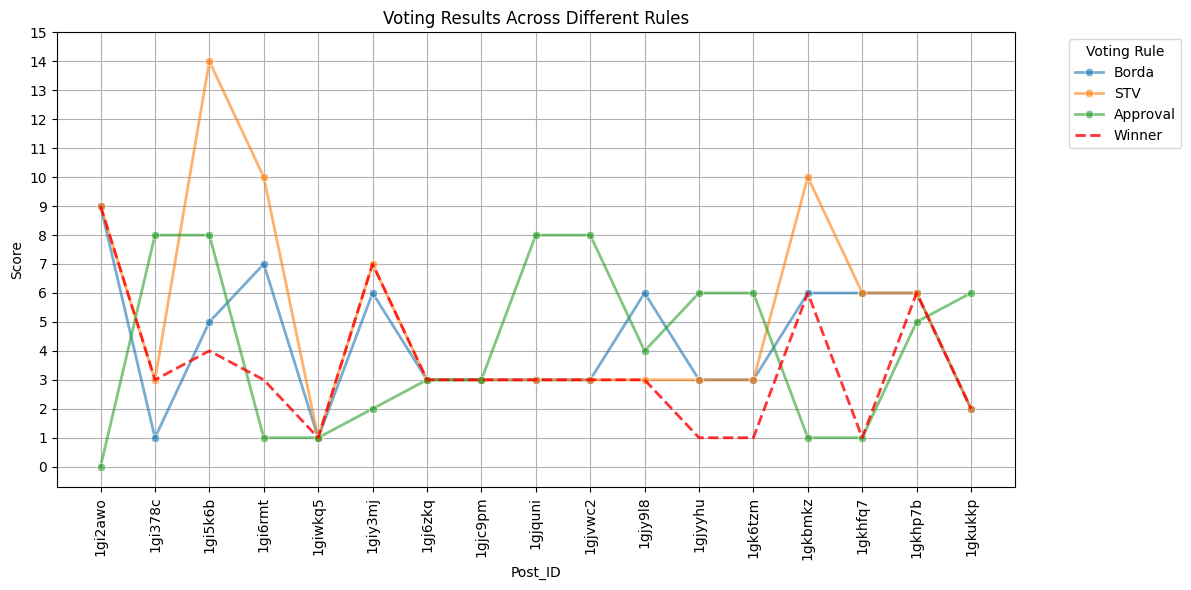

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your voting DataFrame has columns: 'Post_ID', 'plurality', 'borda', 'stv', 'approval', 'copeland'

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting each voting rule as a lighter line
sns.lineplot(data=voting, x='Post_ID', y='borda', label='Borda', marker='o', lw=2, alpha=0.6)
sns.lineplot(data=voting, x='Post_ID', y='stv', label='STV', marker='o', lw=2, alpha=0.6)
sns.lineplot(data=voting, x='Post_ID', y='approval', label='Approval', marker='o', lw=2, alpha=0.6)

# Add the popular column (highlighting the winner) with a different line style and color
sns.lineplot(data=voting, x='Post_ID', y='winner', label='Winner', color='red', linestyle='--', lw=2, alpha=0.8)

# Customizing the plot
plt.xlabel('Post_ID')
plt.ylabel('Score')
plt.title('Voting Results Across Different Rules')
plt.xticks(rotation=90)  # Rotate Post_IDs for readability
plt.legend(title="Voting Rule", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Set y-axis ticks from 0 to 15, with step size of 1
plt.yticks(range(0, 16))  # Adjust this range based on your actual data if needed

# Display the plot
plt.tight_layout()
plt.show()


In [140]:
import pandas as pd

# Assuming your 'voting' DataFrame has columns: 'Post_ID', 'plurality', 'borda', 'stv', 'approval', 'copeland', 'winner'

# List of voting rules to check
voting_rules = ['plurality', 'borda', 'stv', 'approval', 'copeland']

# Function to calculate accuracy for each voting rule
def calculate_accuracy(voting, rule):
    correct_winner = voting['winner']
    predicted_winner = voting[rule]
    accuracy = (correct_winner == predicted_winner).mean()  # Calculate the accuracy
    return accuracy

# Calculate and print accuracy for each voting rule
for rule in voting_rules:
    accuracy = calculate_accuracy(voting, rule)
    print(f'Accuracy for {rule}: {accuracy:.4f}')


Accuracy for plurality: 0.6471
Accuracy for borda: 0.5294
Accuracy for stv: 0.6471
Accuracy for approval: 0.2353
Accuracy for copeland: 0.5294


In [12]:
AGENT_PROMPT_TEMPLATE = PromptTemplate.from_template( """


Given, the description and the comment as your stance, think like this person and try to order ALL the statements from the slate in an order that goes from MOST LIKED to LEAST LIKED.
A random example would be as follows :, if the example post description == "AITA for getting a rescue cat and giving it away later on because it was not my cup of tea?". 
Your example comment to this ==  "YTA, it was your duty to check and educate yourself about the responsibilites that come with adopting a pet cat and how sometimes they can be more difficult because they have been through abuse".
The example slate has 5 statements for example, 
1 : You are not the asshole here because you were doing a good deed but did not prepare for it.
2 : Well if it did not work out then it did not, no point in blaming people now.
3 : You are in the wrong here because you not only gave into your impulses but also were irresponsible with the duties.
4 : Cats look easy to maintain is not a good enough reason to get a stray animal as your pet. You are not prepared to get one
5 : You need to first intereact and see if you are a cat person at all. Reach out to people or friends who have pet cats. 

Given all this information you would have the following order of the statements and the reaasoning for the order.

ORDER = [3,1,4,5,2]
REASONING = Based on the comment you disagree and the poster is in the wrong. Logically, you agree with 1,3 but then also agree with 4,5 a little because that would mean being responsible. You do not agree with 2 so it goes last. 

Now that the example is done. Here are the inputs for the task that you have to perfom. You are a commentor on a post. The post is from r/AITA the with the following description: 
----
DESCRIPTION = {description} 
----
You have put the following comment on the post as a reflection of what you think : 
----
COMMENT = {comment}
----
These are the summarized statements/opinions across all the other comments(including yours) that you have to use for the ordering and give reasoning for that order.
----
SLATE = {slate}
----

RULES TO STRICTILY FOLLOW : 
1. DO NOT SKIP any statements.You NEED TO RANK all of the statements.
2. ONLY respond with ONE COMPLETE LIST OF ORDERING and the REASONING(based on your comment and slate) justifying that ordering.
3. FOLLOW the format from the example. You might have a different number of statements(10 0r 15) so ADAPT accordingly. 
4. Each RANK should be in the output EXACTLY ONCE.
5. Given above is JUST AN EXAMPLE for you. Do not use the same context, but try to understand how the task is to be done from this example.
6. DO NOT USE THE SAME SLATE or THE SAME ORDERING from the EXAMPLE, use the slate statements, description and comment given to you after the example for the task
7. DO NOT RETURN ANY EXTRA ITEMS except for the VALID ORDER and REASONING

""")

NameError: name 'PromptTemplate' is not defined

In [ ]:
# new llm instance
llm = ChatGroq(
    model= "mixtral-8x7b-32768",
    groq_api_key = "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",
    temperature = 0
)

In [ ]:
test = '1gi2awo'

description = clean_data.loc[
    (clean_data["Post_ID"] == test) & (clean_data["Type"] == "Post"), 
    "clean_text"
].values[0]

comments =  clean_data.loc[
    (clean_data["Post_ID"] == test) & (clean_data["Type"] != "Post"), 
    "clean_text"
]
slate = slates[test].dropna()
slate_dict = {num+1:value for num, value in enumerate(slate)}

In [13]:
# post id data needed for just final verdicts : 
comments_post_id = clean_data.loc[(clean_data["Post_ID"] == test)& (clean_data["Type"] != "Post")]

In [ ]:
# Make a copy of the clean_data DataFrame
clean_data_pref = clean_data.copy()

# Filter the DataFrame for rows where "Post_ID" is in the 'posts' list
clean_data_pref = clean_data_pref.loc[clean_data_pref["Post_ID"].isin(posts)]

# Add the 'response' column if it doesn't already exist
if "response" not in clean_data_pref.columns:
    clean_data_pref["response"] = None  # Initialize with None or an empty value

# sanity check
assert clean_data_pref["Post_ID"].unique().sort() == posts.sort()

count = 0
# Iterate through the filtered DataFrame rows
for index, row in clean_data_pref.iterrows():
    if count <1:
        if row["Type"] == "Comment":
            # Initialize description and comment variables
            description = row["Title"]
            comment = row["clean_text"]
        
            # Retrieve the slate for the current Post_ID
            slate = slates[row["Post_ID"]].dropna()
            slate_dict = {num+1:value for num, value in enumerate(slate)}
    
            # put the corresponding responses in the dict with author and then the ranking
            chain_extract = AGENT_PROMPT_TEMPLATE | llm 
            response = chain_extract.invoke(input = {"description" : description, "comment" : comment, "slate" : slate_dict})
            print(response.content)
            row["response"] = response.content

            # Update the DataFrame with the response
            clean_data_pref.at[index, "response"] = response.content
            count += 1
